### It is a type of learning that learns from ulabeled data which means that the data does not have not any pre-existing labels or categories.
### The goal is to discover patterns and relationships in the data without any explicit guidance.
### there are 2 types of unsupervised learning that are defined below
## Clustering: 
#### divide the raw data into clusters of the same nature and based on the clusters the predictions are made
## Association:
#### arrange the raw data in suitable manner so as the model performs well in realtionships between variables
### list of unsupervised learning is as under
#### K-means, hierchichal, DBSCAN, apriori, principle component analysis

## K-means clustering:
### It groups the unlabeled data into different clusters.
### K = pre-defined clusters that need to be created in the process.
### makes clusters based on mean and is mostly applied on the data which is linearly separable 
### Elbow method is used to find out the optimal number of clusters using the WCSS is method. 


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for model
from sklearn.cluster import KMeans

In [17]:
# load the dataset
d_set=pd.read_csv("iris.csv")
d_set.drop(columns=['species'], axis=1, inplace=True)
d_set.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


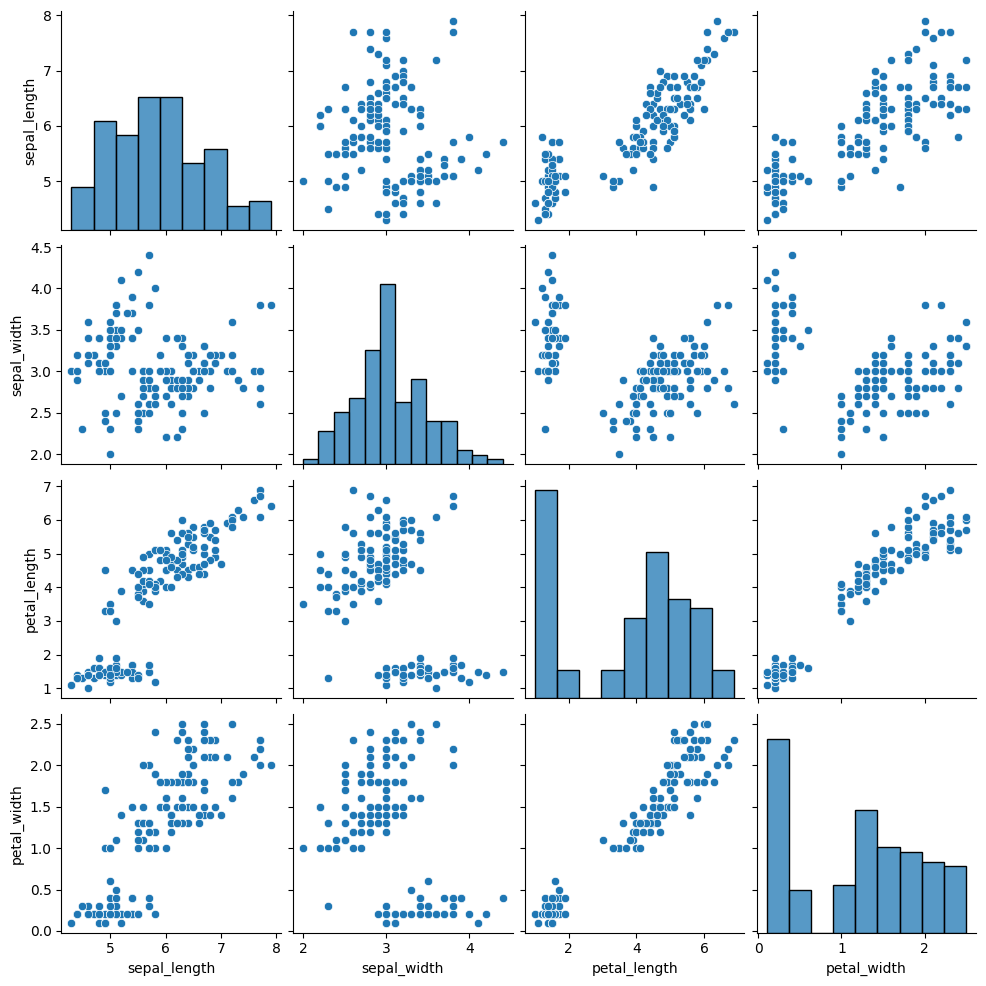

In [18]:
# graphical representation
sns.pairplot(data=d_set)
plt.show()

### result: from above grfaph it is clear that the data points are linearly separable

In [22]:
# find the wcss for k number of clusters
wcss=[]

# running the clusters from 2 to 20
for i in range(2,21):
    km=KMeans(n_clusters=i, init='k-means++') # here init is used to find the best clusters and is mandatory to provide
    
    # fit the data
    km.fit(d_set)

    # find the wcss values and append in the above list
    wcss.append(km.inertia_) # inertia_ is used to find the wcss values

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

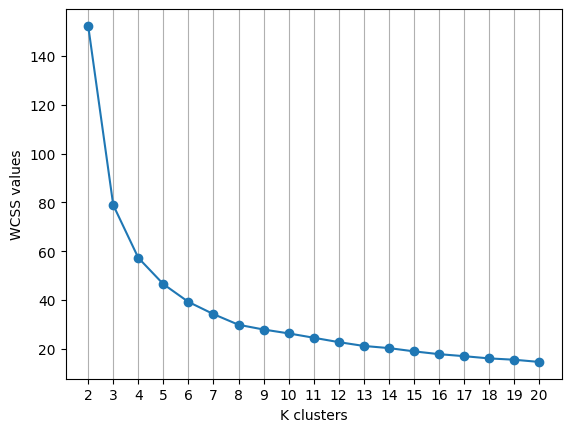

In [26]:
# ploting the graph between wcss and number of clusters
plt.plot([i for i in range(2,21)], wcss, marker='o') # graph between the number of clusters from 2 to 21 and the wcss values
plt.xlabel("K clusters")
plt.ylabel("WCSS values")
plt.xticks([i for i in range(2,21)])
plt.grid(axis='x')
plt.show()

### result: from the above graph it can be seen that after 3 the line starts going down and therefore, the best number of clusters are 3

In [27]:
# now model
km=KMeans(n_clusters=3)

#  fit the data
km.fit(d_set)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [28]:
# predict the values
d_set['predicted']=km.predict(d_set)

In [30]:
d_set['predicted'].value_counts()

0    62
1    50
2    38
Name: predicted, dtype: int64

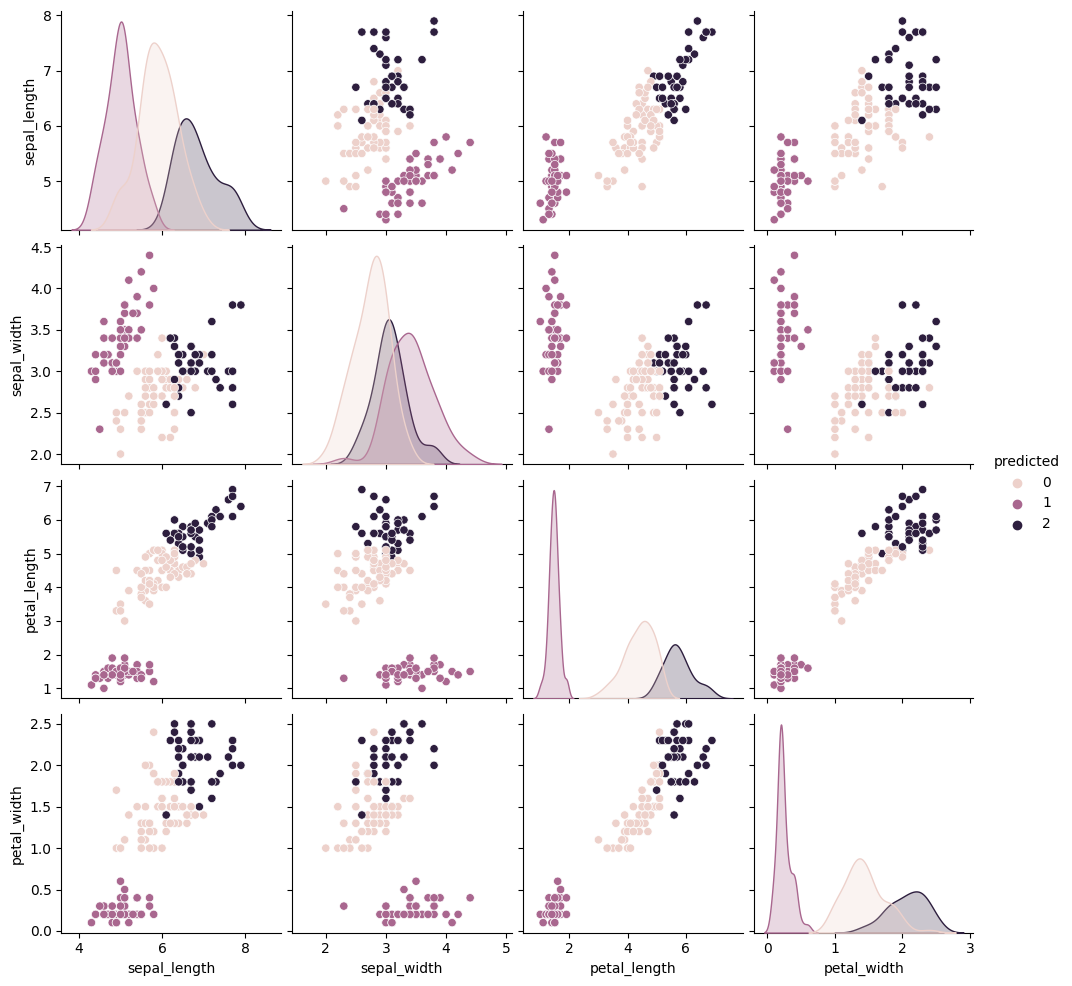

In [36]:
# to visualise the numberd of cluster
sns.pairplot(data=d_set, hue='predicted')
plt.show()

### now check the vaidity of above graph using the orignal data with species column as follows

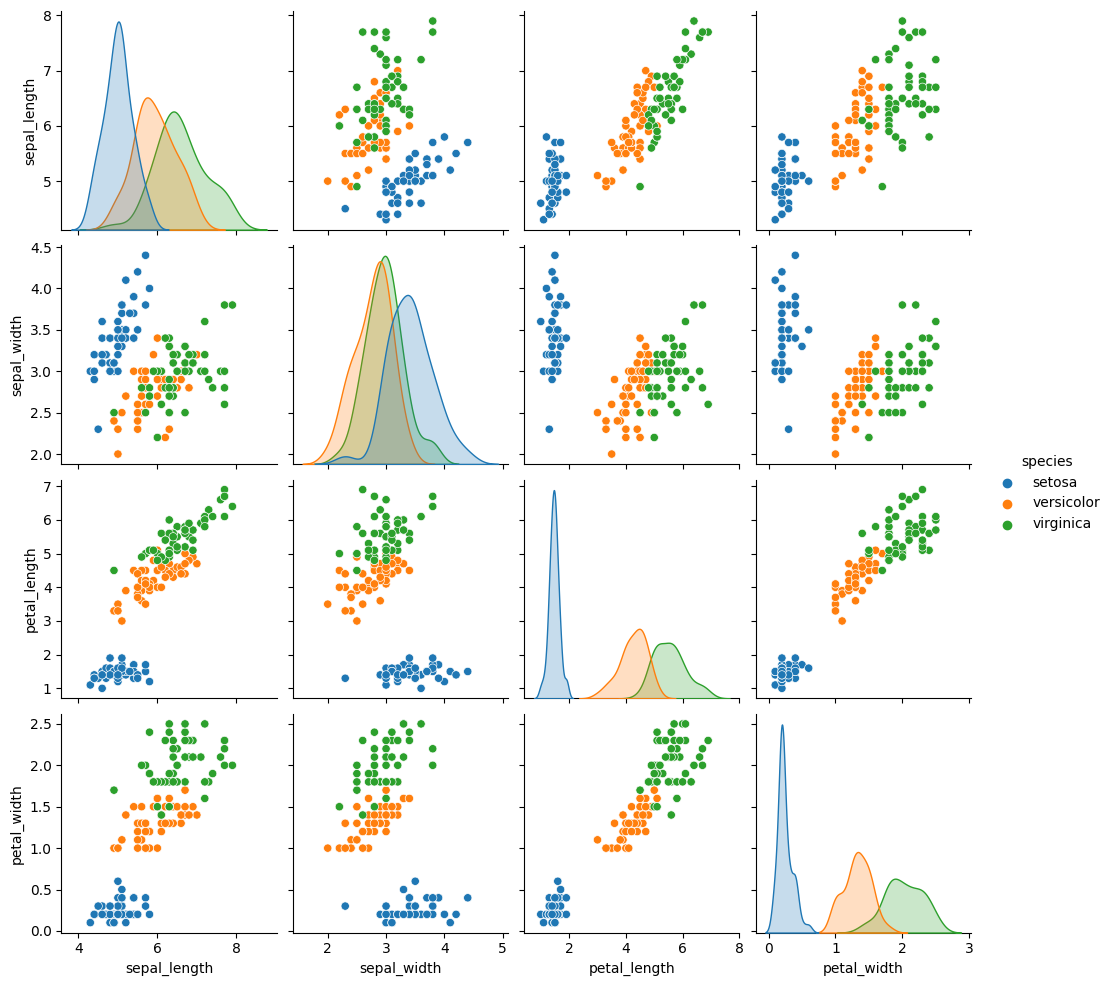

In [33]:
# original data
org_data=pd.read_csv("iris.csv")

# plot the graph
sns.pairplot(data=org_data, hue='species')
plt.show()

## Result: 
#### both of above graphs are similar in nature and hence it is concluded that the model is trained well

In [38]:
d_set

,sepal_length,sepal_width,petal_length,petal_width,predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
# sample prediction from dataset (6.2	3.4	5.4	2.3	2)
km.predict([[6.2, 3.4, 5.4, 2.3]])


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

### result: from the above answer it is clear that the model is performing well